In [1]:
import pyfas as fa
import pandas as pd
import matplotlib.pyplot as plt

# OLGA tpl files, examples and howto

For an tpl file the following methods are available:

* <b>filter_data</b> - return a filtered subset of trends
* <b>extract</b> - extract a single trend variable
* <b>to_excel</b> - dump all the data to an excel file

The usual workflow should be:

1. Load the correct tpl
2. Select the desired variable(s)
3. Extract the results or dump all the variables to an excel file
4. Post-process your data in Excel or in the notebook itself

## Tpl loading

To load a specific tpl file the correct path and filename have to be provided:

In [2]:
tpl_path = '../../pyfas/test/test_files/'
fname = '11_2022_BD.tpl'
tpl = fa.Tpl(tpl_path+fname)

### Trend selection

A tpl file may contain hundreds of trends, in particular for complex networks. For this reason a filtering method is quite useful. A trend can be specified in an OLGA input files in differnet ways, the identification of a single trend may be not trivial.  
The easiest way is to filter all the trends using patters, the command `tpl.filter_trends("PT")` filters all the pressure trends (or better, all the trends with "PT" in the description, if you have defined a temperature trend in the position "PTTOPSIDE", for example, this trend will be selected too).
The resulting python dictionaly will have a unique index for each filtered trend that can be used to identify the interesting trend(s).
In case of an emply pattern all the available trends will be reported.

In [3]:
tpl.filter_data('PT')

{9: "PT 'POSITION:' 'EXIT' '(PA)' 'Pressure'\n",
 37: "PT 'POSITION:' 'BOTTOMHOLE' '(PA)' 'Pressure'\n",
 38: "PT 'POSITION:' 'TUBINGHEAD' '(PA)' 'Pressure'\n",
 39: "PT 'POSITION:' 'DC6' '(PA)' 'Pressure'\n",
 40: "PT 'POSITION:' 'DC7' '(PA)' 'Pressure'\n",
 41: "PT 'POSITION:' 'DC8' '(PA)' 'Pressure'\n",
 42: "PT 'POSITION:' 'DC9' '(PA)' 'Pressure'\n",
 43: "PT 'POSITION:' 'RBM' '(PA)' 'Pressure'\n",
 44: "PT 'POSITION:' 'EXIT' '(PA)' 'Pressure'\n"}

or

In [4]:
tpl.filter_data("'POSITION:' 'EXIT'")

{3: "GLT 'POSITION:' 'EXIT' '(KG/S)' 'Total liquid mass flow'\n",
 4: "GLTHL 'POSITION:' 'EXIT' '(KG/S)' 'Mass flow rate of oil'\n",
 5: "GLTWT 'POSITION:' 'EXIT' '(KG/S)' 'Mass flow rate of water excluding vapour'\n",
 6: "GLWVT 'POSITION:' 'EXIT' '(KG/S)' 'Total mass flow rate of water including Vapour'\n",
 7: "GT 'POSITION:' 'EXIT' '(KG/S)' 'Total mass flow'\n",
 8: "HOL 'POSITION:' 'EXIT' '(-)' 'Holdup (liquid volume fraction)'\n",
 9: "PT 'POSITION:' 'EXIT' '(PA)' 'Pressure'\n",
 10: "QLT 'POSITION:' 'EXIT' '(M3/S)' 'Total liquid volume flow'\n",
 11: "TM 'POSITION:' 'EXIT' '(C)' 'Fluid temperature'\n",
 12: "UL 'POSITION:' 'EXIT' '(M/S)' 'Average liquid film velocity'\n",
 20: "HOL 'POSITION:' 'EXIT' '(-)' 'Holdup (liquid volume fraction)'\n",
 28: "HOLWT 'POSITION:' 'EXIT' '(-)' 'Water volume fraction'\n",
 36: "ID 'POSITION:' 'EXIT' '(-)' 'Flow regime: 1=Stratified, 2=Annular, 3=Slug, 4=Bubble.'\n",
 44: "PT 'POSITION:' 'EXIT' '(PA)' 'Pressure'\n",
 52: "Q2 'POSITION:' 'EXIT' 

The same outpout can be reported as a pandas dataframe:

In [5]:
pd.DataFrame(tpl.filter_data('PT'), index=("Trends",)).T

,Trends
9,PT 'POSITION:' 'EXIT' '(PA)' 'Pressure'\n
37,PT 'POSITION:' 'BOTTOMHOLE' '(PA)' 'Pressure'\n
38,PT 'POSITION:' 'TUBINGHEAD' '(PA)' 'Pressure'\n
39,PT 'POSITION:' 'DC6' '(PA)' 'Pressure'\n
40,PT 'POSITION:' 'DC7' '(PA)' 'Pressure'\n
41,PT 'POSITION:' 'DC8' '(PA)' 'Pressure'\n
42,PT 'POSITION:' 'DC9' '(PA)' 'Pressure'\n
43,PT 'POSITION:' 'RBM' '(PA)' 'Pressure'\n
44,PT 'POSITION:' 'EXIT' '(PA)' 'Pressure'\n


The `view_trends` method provides the same info better arranged:

In [18]:
tpl.view_trends('PT')

,Index,Variable,Position,Unit,Description
Filter: PT,,,,,
0,37,PT,POSITION - BOTTOMHOLE,PA,Pressure
1,38,PT,POSITION - TUBINGHEAD,PA,Pressure
2,39,PT,POSITION - DC6,PA,Pressure
3,40,PT,POSITION - DC7,PA,Pressure
4,9,PT,POSITION - EXIT,PA,Pressure
5,41,PT,POSITION - DC8,PA,Pressure
6,43,PT,POSITION - RBM,PA,Pressure
7,44,PT,POSITION - EXIT,PA,Pressure
8,42,PT,POSITION - DC9,PA,Pressure


---

### Dump to excel

To dump all the variables in an excel file use `tpl.to_excel()`
If no path is provided an excel file with the same name of the tpl file is generated in the working folder. Depending on the tpl size this may take a while.

### Extract a specific variable

Once you know the variable(s) index you are interested in (see the filtering paragraph above for more info) you can extract it (or them) and use the data directly in python.

Let's assume you are interested in the inlet pressure and the outlet temperature:

In [17]:
tpl.view_trends('TM')

,Index,Variable,Position,Unit,Description
Filter: TM,,,,,
0,59,TM,POSITION - RBM,C,Fluid temperature
1,53,TM,POSITION - BOTTOMHOLE,C,Fluid temperature
2,54,TM,POSITION - TUBINGHEAD,C,Fluid temperature
3,55,TM,POSITION - DC6,C,Fluid temperature
4,56,TM,POSITION - DC7,C,Fluid temperature
5,57,TM,POSITION - DC8,C,Fluid temperature
6,58,TM,POSITION - DC9,C,Fluid temperature
7,11,TM,POSITION - EXIT,C,Fluid temperature
8,60,TM,POSITION - EXIT,C,Fluid temperature


In [14]:
tpl.view_trends('PT')

,Index,Variable,Position,Unit,Description
Filter: PT,,,,,
0,37,PT,POSITION - BOTTOMHOLE,PA,Pressure
1,38,PT,POSITION - TUBINGHEAD,PA,Pressure
2,39,PT,POSITION - DC6,PA,Pressure
3,40,PT,POSITION - DC7,PA,Pressure
4,9,PT,POSITION - EXIT,PA,Pressure
5,41,PT,POSITION - DC8,PA,Pressure
6,43,PT,POSITION - RBM,PA,Pressure
7,44,PT,POSITION - EXIT,PA,Pressure
8,42,PT,POSITION - DC9,PA,Pressure


Our targets are:

<i>variable 11</i> - TM 'POSITION:' 'EXIT' '(C)' 'Fluid temperature'

and  

<i>variable 38</i> - PT 'POSITION:' 'TUBINGHEAD' '(PA)' 'Pressure'\

Now we can proceed with the data extraction:

In [8]:
# single trend extraction
tpl.extract(11)
tpl.extract(38)

# multiple trends extraction
tpl.extract(12, 37)

The tpl object now has the four trends available in the `data` attribute:

In [11]:
tpl.data.keys()

dict_keys([11, 12, 37, 38])

while the *label* attibute stores the variable type as a dictionary:

In [15]:
tpl.label

{11: 'TM POSITION: EXIT (C) Fluid temperature',
 12: 'UL POSITION: EXIT (M/S) Average liquid film velocity',
 37: 'PT POSITION: BOTTOMHOLE (PA) Pressure',
 38: 'PT POSITION: TUBINGHEAD (PA) Pressure'}

### Data processing

The results available in the data attribute are numpy arrays and can be easily manipulated and plotted:

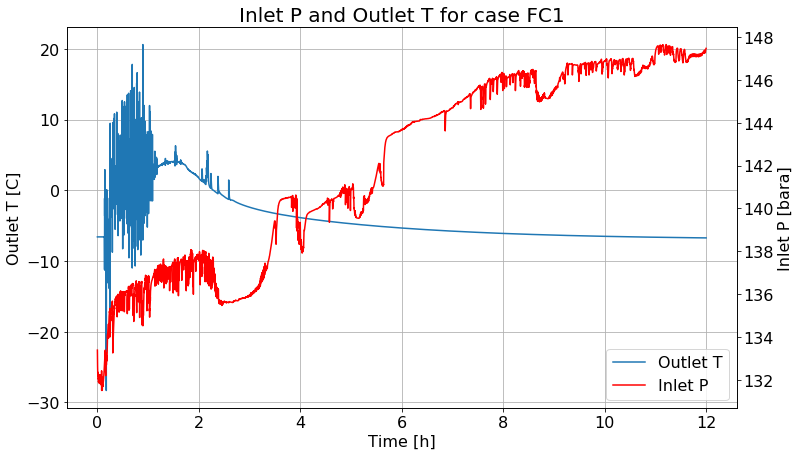

In [49]:
%matplotlib inline

pt_inlet = tpl.data[38]
tm_outlet = tpl.data[11]

fig, ax1 = plt.subplots(figsize=(12, 7));
ax1.grid(True)
p0, = ax1.plot(tpl.time/3600, tm_outlet)
ax1.set_ylabel("Outlet T [C]", fontsize=16)
ax1.set_xlabel("Time [h]", fontsize=16)

ax2 = ax1.twinx()
p1, = ax2.plot(tpl.time/3600, pt_inlet/1e5, 'r')
ax2.grid(False)
ax2.set_ylabel("Inlet P [bara]", fontsize=16)

ax1.tick_params(axis="both", labelsize=16)
ax2.tick_params(axis="both", labelsize=16)


plt.legend((p0, p1), ("Outlet T", "Inlet P"), loc=4, fontsize=16)
plt.title("Inlet P and Outlet T for case FC1", size=20);

### Advanced data processing

An example of advanced data processing for Python enthusiasts and professional flow assurance. Script below extracts variable trends at given positions. Usage instructions:
- For unit conversion multiplication factors for every variable can be provided.
- Only few global variables and lists have to be defined (allMul, allVar, allPos, and myTPLFile), there is no need to edit functions, unless you understand what you are doing.
- Extracted trends are written in to a CSV file "OLGA_Simulation.tpl.csv", where "OLGA_Simulation.tpl" is the simulation file.
- The script does not perform error checks, make sure that all variables and positions are present in the simulation file.

In [ ]:
import os
import sys
import time
import pyfas as fa


def getVarsInds(tpl, emptyLst):

	for _, pos in enumerate(allPos):
	
		lst = []
	
		# dictionary of the following kind:
		# {3: "GLT 'POSITION:' 'EXIT' '(KG/S)' 'Total liquid mass flow'\n",
		#  4: "GLTHL 'POSITION:' 'EXIT' '(KG/S)' 'Mass flow rate of oil'\n"}
		myDic = tpl.filter_trends("'POSITION:' '{0}'".format(pos))
	
		for _, var in enumerate(allVar):

			for _, (k, v) in enumerate(myDic.items()):
			
				lstStr = v.split(" ")
				
				if lstStr[0] == var:
				
					lst.append(int(k))
		
		emptyLst.append(lst)


def getData(tplFileName, fullLst):

	myFlag = False
	
	fout = open("{0}.csv".format(tplFileName), 'w')
	
	# write header
	outLine = ""
	for _, pos in enumerate(allPos):
		for _, var in enumerate(allVar):
			outLine += "{0},{1} {2},".format( "Time [H]", pos, var )
	
	fout.writelines("{0}\n".format(outLine))

	# write data
	with open(tplFileName) as infile:
		for line in infile:
			
			if myFlag:
				
				myValList = line.split()
				
				myTime = float(myValList[0]) / 3600.0 # in hours
				
				outLine = ""
				
				for i in range(len(allPos)):
					for j in range(len(allVar)):
						outLine += "{0},{1},".format( myTime, float(myValList[fullLst[i][j]]) * allMul[j] )
				
				fout.write("{0}\n".format(outLine))
			
			else:
			
				if line.find("TIME SERIES") > -1: myFlag = True

	fout.close()


def main():

	print( "{0} initialization".format(time.strftime("%H:%M:%S", time.localtime())) )
	fname = myTPLFile
	tpl = fa.Tpl(fname)
	
	# list of indices for vars at every position (separate list for every position in order)
	varIndLst = []
	
	getVarsInds(tpl, varIndLst)
	
	print( "{0} extraction".format(time.strftime("%H:%M:%S", time.localtime())) )
	getData(fname, varIndLst)
	print( "{0} done".format(time.strftime("%H:%M:%S", time.localtime())) )


# multiplication factors and variables
allMul = [1.0, 1.0, 1.0e-5, 1.0]
allVar = ["ROL", "ROG", "PT", "TM"]

# positions
allPos = ["FLOWLINE_1KM", "FLOWLINE_2KM", "FLOWLINE_3KM", "FLOWLINE_4KM", "FLOWLINE_5KM"]

myTPLFile = "OLGA_Simulation.tpl"

main()